In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')

# 1.Load the dataset into python environment

In [ ]:
df = pd.read_excel("Crop.xls")
df

In [ ]:
df.shape

In [ ]:
np.max(df,axis=0)

In [ ]:
np.min(df,axis=0)

# 2.Preprocessing

# 1.Missing Values

In [7]:
df.isna().sum()

Domain         0
Indicator      0
Item           0
Element        0
CountryCode    0
CountryName    0
Region         0
Scenario       0
Units          0
Year           0
Value          0
dtype: int64

There is no missing values in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Domain       65535 non-null  object 
 1   Indicator    65535 non-null  object 
 2   Item         65535 non-null  object 
 3   Element      65535 non-null  object 
 4   CountryCode  65535 non-null  object 
 5   CountryName  65535 non-null  object 
 6   Region       65535 non-null  object 
 7   Scenario     65535 non-null  object 
 8   Units        65535 non-null  object 
 9   Year         65535 non-null  int64  
 10  Value        65535 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 5.5+ MB


In [9]:
df.head()+

,Domain,Indicator,Item,Element,CountryCode,CountryName,Region,Scenario,Units,Year,Value
0,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2012,378941.101287
1,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2030,327151.032340
2,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2035,317999.663286
3,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2040,305439.066285
4,Crop Production,Arable land,Growing of bananas,Rainfed,CHN,"China, mainland",China,Toward Sustainability,ha,2050,282125.857178


In [10]:
df.describe()

,Year,Value
count,65535.000000,6.553500e+04
mean,2033.400000,7.644430e+04
std,12.579444,6.888799e+05
min,2012.000000,1.000000e-03
25%,2030.000000,1.000000e+00
50%,2035.000000,1.453000e+00
75%,2040.000000,3.739800e+01
max,2050.000000,2.101507e+07


<AxesSubplot:>

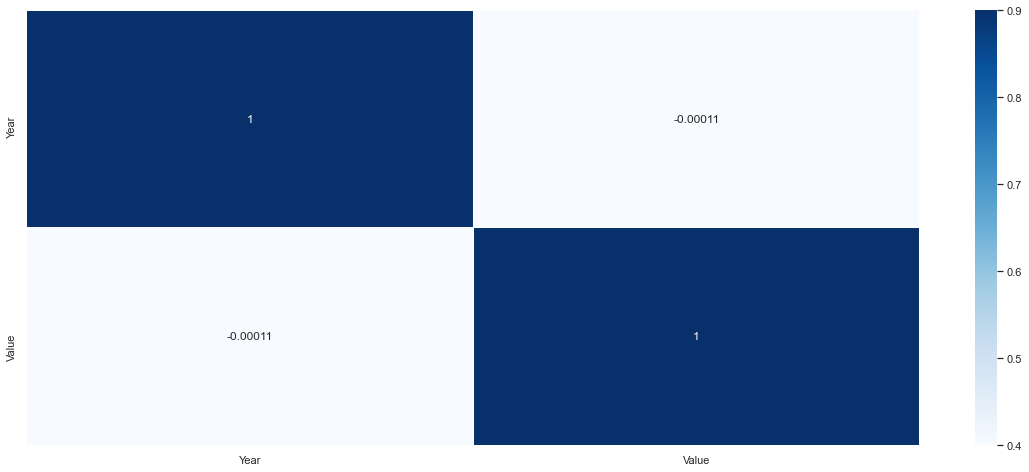

In [11]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='Blues')

# 2.Outlier Detection and Handling

Text(0.5, 1.0, 'Box plot of Year')

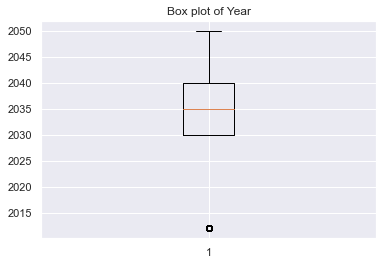

In [104]:
plt.boxplot(df['Year'])
plt.title('Box plot of Year')

Text(0.5, 1.0, 'Box plot of Value')

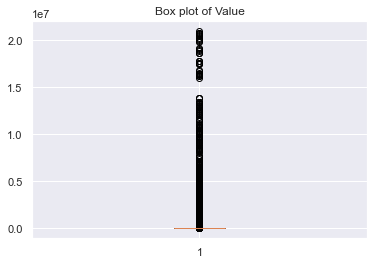

In [14]:
plt.boxplot(df['Value'])
plt.title('Box plot of Value')

In [15]:
Q1 = np.percentile(df['Value'],25,interpolation='midpoint')
Q2 = np.percentile(df['Value'],50,interpolation='midpoint')
Q3 = np.percentile(df['Value'],75,interpolation='midpoint')

In [16]:
print(Q1)
print(Q2)
print(Q3)

1.0
1.453
37.397999999999996


In [17]:
IQR = Q3-Q1


In [18]:
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print(low_limit)
print(up_limit )

-53.596999999999994
91.99499999999999


In [19]:
outlier = []
for x in df['Value']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [20]:
outlier

[378941.101287171,
 327151.032339985,
 317999.663285868,
 305439.066285043,
 282125.857177885,
 406.775,
 434.925,
 423.998,
 408.617,
 380.177,
 378941.101287171,
 325521.884318017,
 301614.427766596,
 277450.495978837,
 234262.534383524,
 406.775,
 363.393,
 338.185,
 312.359,
 265.983,
 378941.101287171,
 348413.388203939,
 330083.797651829,
 310708.759597433,
 275883.292535253,
 406.775,
 391.633,
 373.263,
 353.316,
 317.29,
 95606.9540683695,
 87072.4044398753,
 87604.1733716721,
 87605.7914055427,
 87769.7423863712,
 162.166,
 178.872,
 178.368,
 176.408,
 173.631,
 95606.9540683695,
 111550.270972259,
 113840.363806684,
 115367.173937741,
 118404.979378691,
 162.166,
 194.874,
 196.231,
 195.834,
 195.895,
 95606.9540683695,
 107306.508920419,
 108569.163793389,
 109134.27243541,
 110347.389369022,
 162.166,
 186.942,
 188.532,
 188.415,
 188.939,
 303980.368413357,
 267741.232940929,
 262856.842091494,
 256165.405787667,
 243375.894175102,
 326.308,
 332.719,
 321.072,
 307.43

In [21]:
ind1=df['Value']>up_limit
df.loc[ind1].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            65520, 65521, 65522, 65523, 65524, 65525, 65526, 65527, 65528,
            65529],
           dtype='int64', length=14379)

In [ ]:
df.drop([0,     1,     2,     3,     4,     5,     6,     7,     8,  9, 65520, 65521, 65522, 65523, 65524, 65525, 65526, 65527, 65528,65529],inplace=True)

In [ ]:
plt.boxplot(df['Value'])
plt.title('boxplot of Value')

Dataset has no outiers significantly

In [216]:
x = df.drop(['Domain','Indicator','Item','Element','CountryName','Region','Scenario','Units','CountryCode'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

# 3.Label Encoding

In [217]:
from sklearn.preprocessing import LabelEncoder

In [218]:
labelencoder = LabelEncoder()
x[:, 1] = labelencoder.fit_transform(x[:, 1])
x1 = pd.DataFrame(x)
x1.head()

,0,1
0,-1.701201,22849.0
1,-0.270284,22754.0
2,0.127193,22732.0
3,0.524669,22695.0
4,1.319623,22652.0


In [35]:
df = pd.read_excel("Crop.xls")

In [36]:
df.Indicator.unique()

array(['Arable land', 'Harvested area', 'Cropping intensity',
       'Climate shifter', 'Crop yield', 'Technology shifter'],
      dtype=object)

In [37]:

df.columns

Index(['Domain', 'Indicator', 'Item', 'Element', 'CountryCode', 'CountryName',
       'Region', 'Scenario', 'Units', 'Year', 'Value'],
      dtype='object')

# 6.Feature Engineering



In [53]:
x['mean'] = x[['Year','Value']].mean(axis = 1)
x['sum'] = x[['Year','Value']].sum(axis = 1)
x['skew'] = x[['Year','Value']].skew(axis = 1)
x['kurt'] = x[['Year','Value']].kurt(axis = 1)

In [70]:
y = df['Year']
x = df.drop(['Domain','Indicator','Item','Element','CountryName','Region','Scenario','Units','CountryCode'],axis=1)
x.describe()

,Year,Value
count,65535.000000,6.553500e+04
mean,2033.400000,7.644430e+04
std,12.579444,6.888799e+05
min,2012.000000,1.000000e-03
25%,2030.000000,1.000000e+00
50%,2035.000000,1.453000e+00
75%,2040.000000,3.739800e+01
max,2050.000000,2.101507e+07


In [71]:
x.columns

Index(['Year', 'Value'], dtype='object')

Splitting the data

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.3)

# Standard Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# 4.Classification model 

# building the Model-Logistic Regression Algorithm

In [74]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [75]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


# Building the Model---KNN Algorithm

In [76]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred =  classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [78]:
acc_values

[0.9988810335181323,
 0.9988301714053202,
 0.9991353440821932,
 0.9988301714053202,
 0.9988301714053202,
 0.998779309292508,
 0.9986267229540715,
 0.998474136615635,
 0.9984232745028229,
 0.9982198260515742,
 0.9982706881643864,
 0.9981181018259498]

Text(0, 0.5, 'Accuracy')

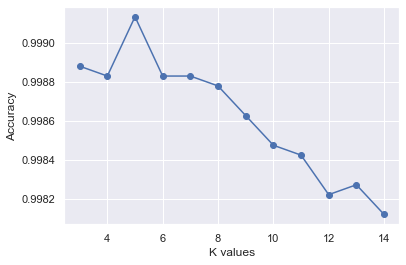

In [79]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [80]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)   

In [81]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9991353440821932
Precision is:  0.9991353440821932
Recall is:  0.9991353440821932
F1 score is:  0.9991353440821932


In [82]:
confusion_matrix(y_test,y_pred)

array([[3924,    0,    0,    0,    0],
       [   0, 3881,    5,    0,    0],
       [   0,    2, 3950,    1,    0],
       [   0,    5,    0, 3920,    0],
       [   0,    0,    2,    2, 3969]], dtype=int64)

# building the Model-Decision Tree Algorithm

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [84]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [85]:
confusion_matrix(y_test,y_pred)

array([[3924,    0,    0,    0,    0],
       [   0, 3886,    0,    0,    0],
       [   0,    0, 3953,    0,    0],
       [   0,    0,    0, 3925,    0],
       [   0,    0,    0,    0, 3973]], dtype=int64)

# Building the Model---Rain Forest Classifier Algorithm

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [102]:
confusion_matrix (y_test, y_pred)

array([[3924,    0,    0,    0,    0],
       [   0, 3886,    0,    0,    0],
       [   0,    0, 3953,    0,    0],
       [   0,    0,    0, 3925,    0],
       [   0,    0,    0,    0, 3973]], dtype=int64)

# 3.Exploratory Data Analysis

In [121]:
df.columns

Index(['Domain', 'Indicator', 'Item', 'Element', 'CountryCode', 'CountryName',
       'Region', 'Scenario', 'Units', 'Year', 'Value'],
      dtype='object')

# 2.Bivariate Analysis

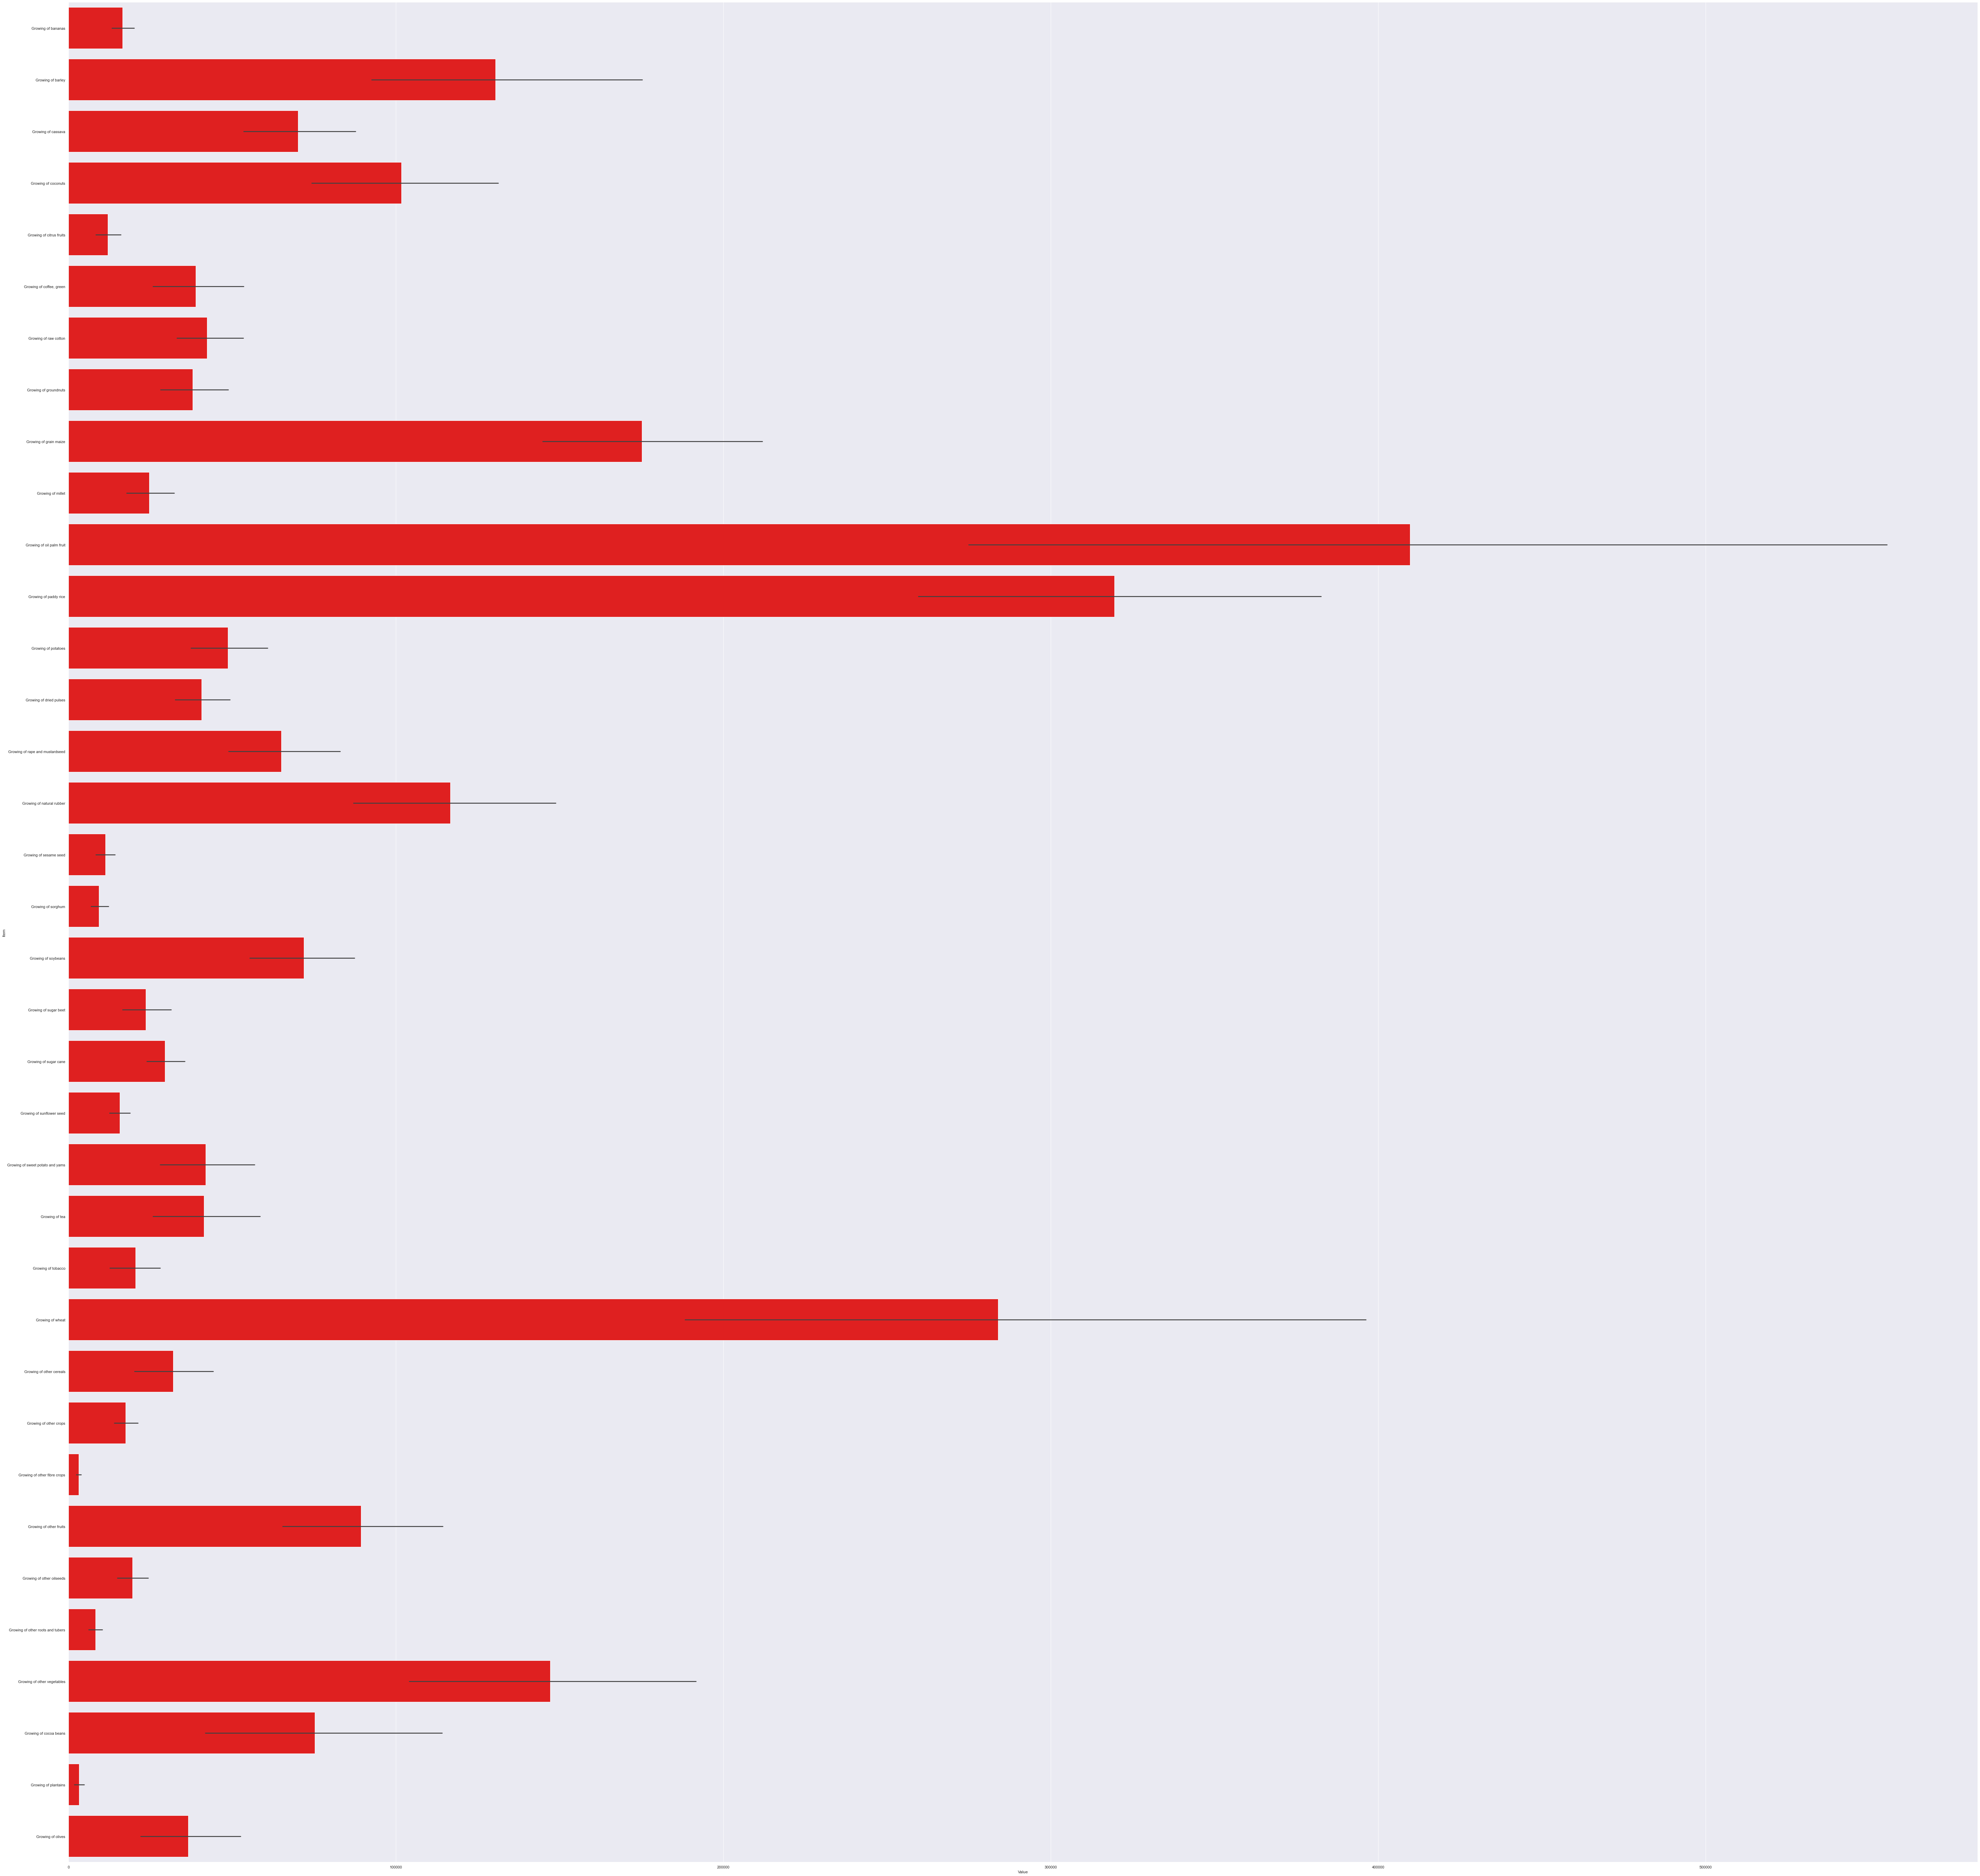

In [156]:
s1 = sns.barplot(x ='Value', y ='Item', data = df, color = 'red')
plt.rcParams['figure.figsize']=1000,100

Growing of oil palm fruit is the highest among all crop production.

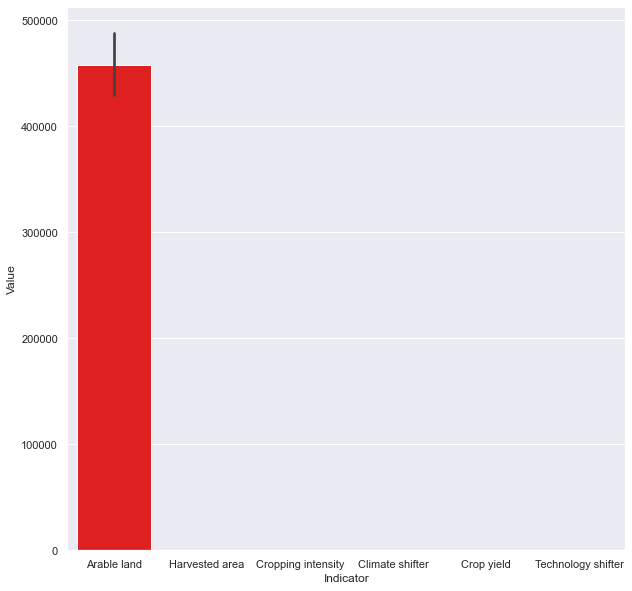

In [136]:
s1 = sns.barplot(x ='Indicator', y ='Value', data = df, color = 'red')
plt.rcParams['figure.figsize']=10,10

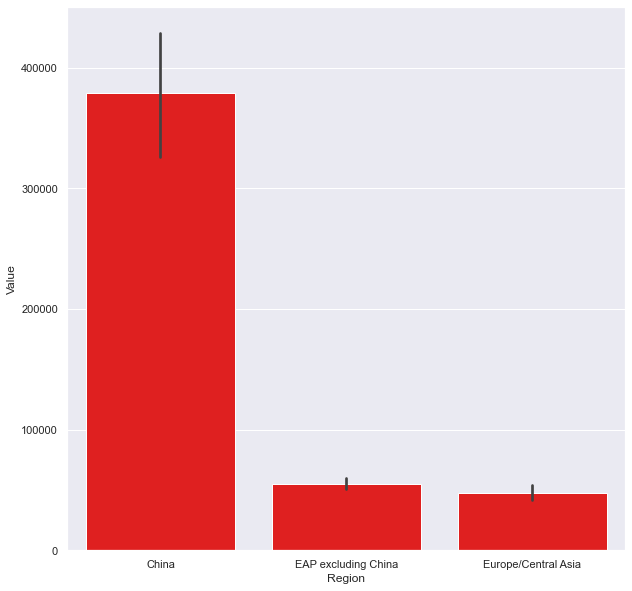

In [137]:
s1 = sns.barplot(x ='Region', y ='Value', data = df, color = 'red')
plt.rcParams['figure.figsize']=10,10

China is the largest crop producer.

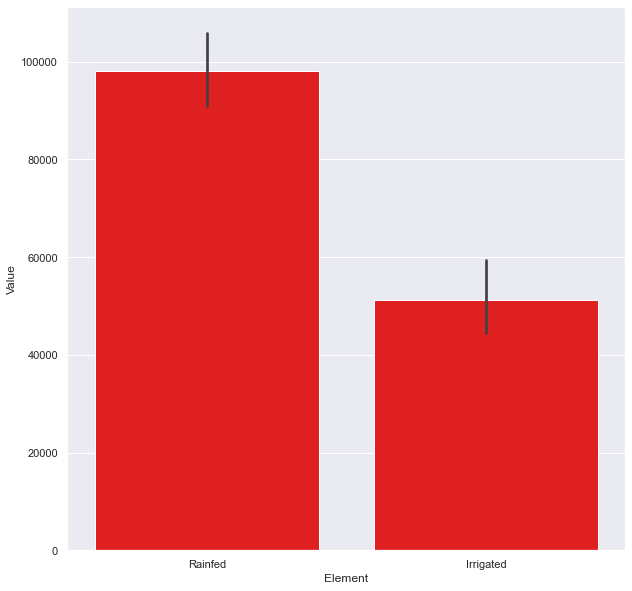

In [139]:
s1 = sns.barplot(x ='Element', y ='Value', data = df, color = 'red')
plt.rcParams['figure.figsize']=10,10

Most of the crops are Rainfed rather than irrigating.

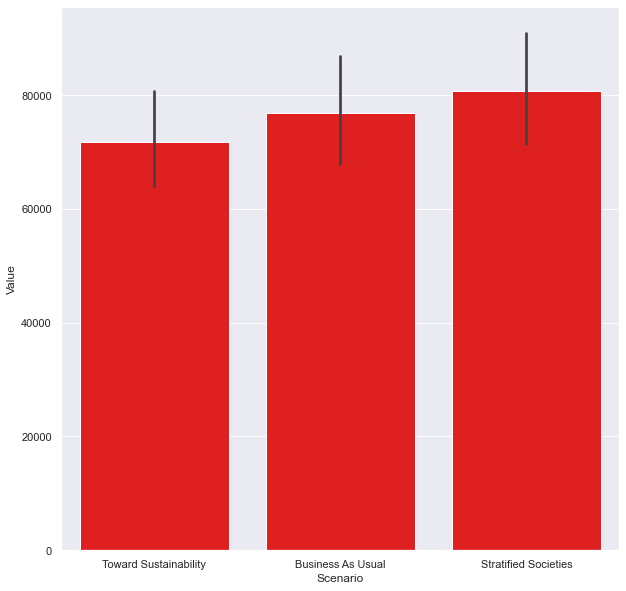

In [184]:
s1 = sns.barplot(x ='Scenario', y ='Value', data = df, color = 'red')
plt.rcParams['figure.figsize']=10,10

The scenario seems to be Stratified societies.

In [185]:
df.corr()

,Year,Value
Year,1.000000,-0.000114
Value,-0.000114,1.000000


The correlation coefficient is-0.000114, so no Relationship between them.

# 1.Univariate Analysis

In [176]:
df['Element'].value_counts()

Rainfed      35280
Irrigated    30255
Name: Element, dtype: int64

In [177]:
df['CountryName'].value_counts()

China, mainland                          4950
Myanmar                                  4140
Thailand                                 4050
Rest of EAP                              3780
Viet Nam                                 3690
Cambodia                                 3060
Indonesia                                2790
Lao People's Democratic Republic         2700
Philippines                              2520
Democratic People's Republic of Korea    2520
Turkey                                   2355
Malaysia                                 2070
Kazakhstan                               1980
Tajikistan                               1890
Rest of ECA                              1800
Russian Federation                       1710
Azerbaijan                               1710
Bulgaria                                 1620
Uzbekistan                               1620
Kyrgyzstan                               1530
Romania                                  1530
Republic of Moldova               

In [175]:
df['Domain'].value_counts()

Crop Production    65535
Name: Domain, dtype: int64

In [174]:
df['Region'].value_counts()

EAP excluding China    32580
Europe/Central Asia    28005
China                   4950
Name: Region, dtype: int64

In [173]:
df['Item'].value_counts()

Growing of dried pulses              5130
Growing of grain maize               4500
Growing of potatoes                  4320
Growing of barley                    3780
Growing of citrus fruits             3150
Growing of paddy rice                2880
Growing of soybeans                  2700
Growing of rape and mustardseed      2610
Growing of sugar beet                2520
Growing of other vegetables          2160
Growing of raw cotton                2160
Growing of groundnuts                2160
Growing of other fruits              1800
Growing of sesame seed               1800
Growing of sugar cane                1800
Growing of other crops               1800
Growing of sorghum                   1620
Growing of sunflower seed            1545
Growing of other fibre crops         1530
Growing of millet                    1530
Growing of coconuts                  1350
Growing of tobacco                   1260
Growing of other oilseeds            1260
Growing of sweet potato and yams  

<AxesSubplot:xlabel='Value', ylabel='Density'>

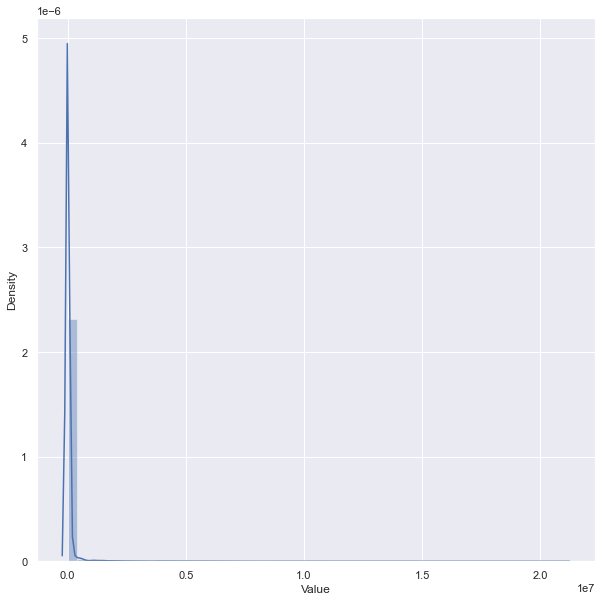

In [187]:
sns.distplot(df.Value) # numeric


<AxesSubplot:xlabel='Year', ylabel='Density'>

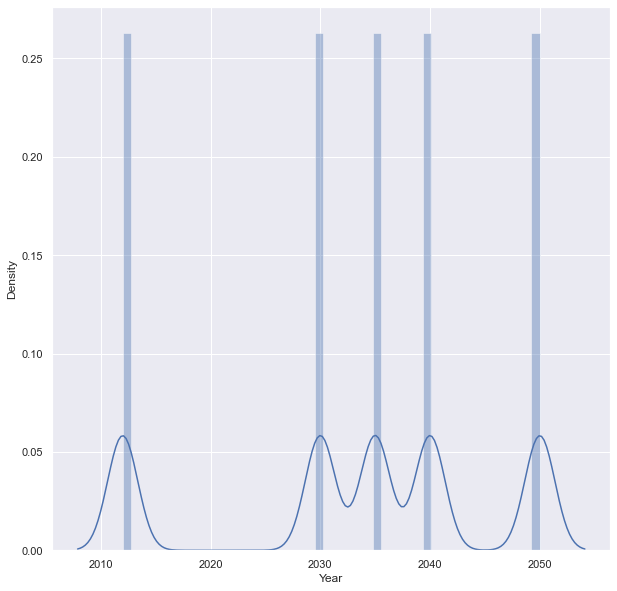

In [188]:
sns.distplot(df.Year) # numeric

In [198]:
sns.countplot(df.Item) 
plt.rcParams['figure.figsize']=300,100

In [ ]:
plt.rcParams['figure.figsize'] = (50, 100)
sns.countplot(df['Item'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 19)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [ ]:
df['Item'].value_counts().sort_index().plot.line()